# Text Detection

Text detection is one of the easiest applications of computer vision which has a wide variety of applications with detection of text in a scene like on a bill board or directions or in an image like a paragraph where the model can detect the text content in the image. 
<hr style="border:2px solid gray"> </hr>

## Goal

## $~~~~~~~~~~~~~~~~~~~~$Input$~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~$Output
![image](./visuals/english_signboard_detected.jpg )    

## Workflow

- Import the libraries that is used for the program
- Import the image to detect the text
- Import the East text detector module from the Open CV module to be used for detecting text
- Scale and resize the image to get it to the required size
- Apply text detector on the image to obtain the confusion matrix and the bounding box vertices of the text
- Draw bounding boxes over the detected text

## Import the required libraries

All the function libraries that are needed in this code is imported here. Notable libraries :-
- cv2 :- Open CV computer vision library
- numpy :- High level mathematical library
- matplotlib :- Used for plotting and displaying images

In [1]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
from IPython.display import Image


plt.rcParams['image.cmap'] = 'gray'

## Display Image to be used

Here, import the images to be used into using the imread method in the opencv library and display the images simultaneously using the imshow function in the matplotlib.pyplot library.Refer below to see the syntax :-

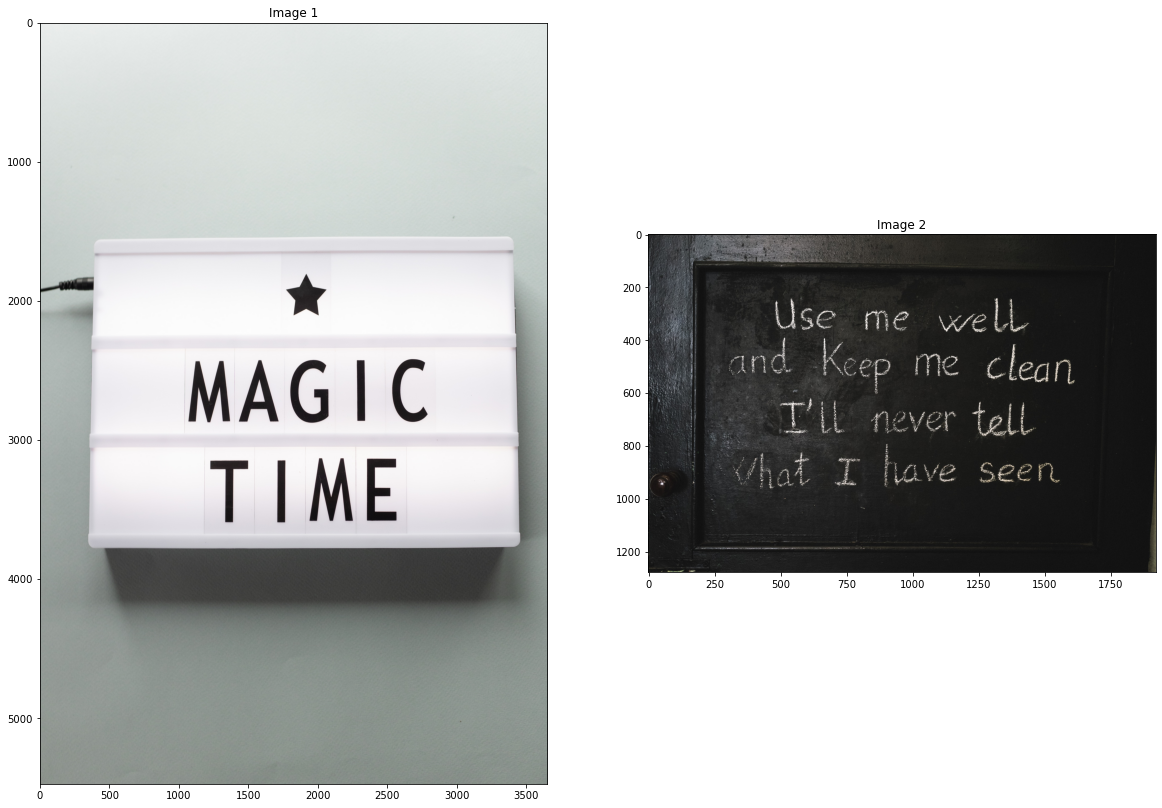

In [2]:
# Load Image
img1 = cv2.imread('./visuals/english_signboard.jpg')
img2 = cv2.imread('./visuals/Board.jpg')
# Display the image
plt.figure(figsize=(20,20))
plt.subplot(121); plt.imshow(img1[:,:,::-1]); plt.title('Image 1');
plt.subplot(122); plt.imshow(img2[:,:,::-1]); plt.title('Image 2');

## Import the prebuild text detection and text recognition model files

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>

For the text detection in the image, we will be using the East text detection deep learning neural network model as well as DB text detection deep learning neural network model .The both text detectors are a neural network that has been trained using images containing words and it detect the presence of text in the image to return the x,y values of vertices of ROI containing the text as its output.

[**`East Text Detection Model()`**](https://docs.opencv.org/master/d8/ddc/classcv_1_1dnn_1_1TextDetectionModel__EAST.html)<br>
[**`DB Text Detection Model()`**](https://docs.opencv.org/master/db/d0f/classcv_1_1dnn_1_1TextDetectionModel__DB.html)


In [3]:
# East model for text-detection
text_detector_east = cv2.dnn_TextDetectionModel_EAST("resources/frozen_east_text_detection.pb")
confThresh = 0.8
nmsThresh = 0.4
text_detector_east.setConfidenceThreshold(confThresh).setNMSThreshold(nmsThresh)
text_detector_east.setInputParams(1.0, (320, 320), (123.68, 116.78, 103.94) , True)

In [4]:
# DB model for text-detection based on resnet50
text_detector_db50 = cv2.dnn_TextDetectionModel_DB("resources/DB_TD500_resnet50.onnx")
# DB model for text-detection based on resnet18
text_detector_db18 = cv2.dnn_TextDetectionModel_DB("resources/DB_TD500_resnet18.onnx")
binThresh = 0.3
polyThresh = 0.5
maxCandidates = 200
unclipRatio = 2.0

text_detector_db18.setBinaryThreshold(binThresh).setPolygonThreshold(polyThresh).setMaxCandidates(maxCandidates).setUnclipRatio(unclipRatio)
text_detector_db18.setInputParams(1.0/255, (736, 736), (122.67891434, 116.66876762, 104.00698793) , True)

text_detector_db50.setBinaryThreshold(binThresh).setPolygonThreshold(polyThresh).setMaxCandidates(maxCandidates).setUnclipRatio(unclipRatio)
text_detector_db50.setInputParams(1.0/255, (736, 736), (122.67891434, 116.66876762, 104.00698793) , True)

## Set Scale Factor for resize 

Scaling factor is defined according to the input size of different images so that output scaled image of a standard size is obtained every time. 

In [5]:
# Defining function that returns the scale factor to resize the output image according to 
# the size/shape matrix of the input image
def setScaleFactor(frame):

    #Get image height and width
    frame_h, frame_w, ch = frame.shape
    
    # Define scaling factor according to preset values of the input image size so as 
    # the output image is scaled down to a generic size,"k" is the scaling factor value
    if (frame_h > 2000) and (frame_w > 2000):
        k = 0.2
    elif (2000 > frame_h > 1000) and 2000 > frame_w > 1000:
        k = 0.4
    elif (frame_h < 1000) or frame_w < 1000:
        k = 0.6
    elif (frame_h < 500) and frame_w < 500:
        k = 1
    else:
        k = 0.5
    return k

Text(0.5, 1.0, 'Image 1')

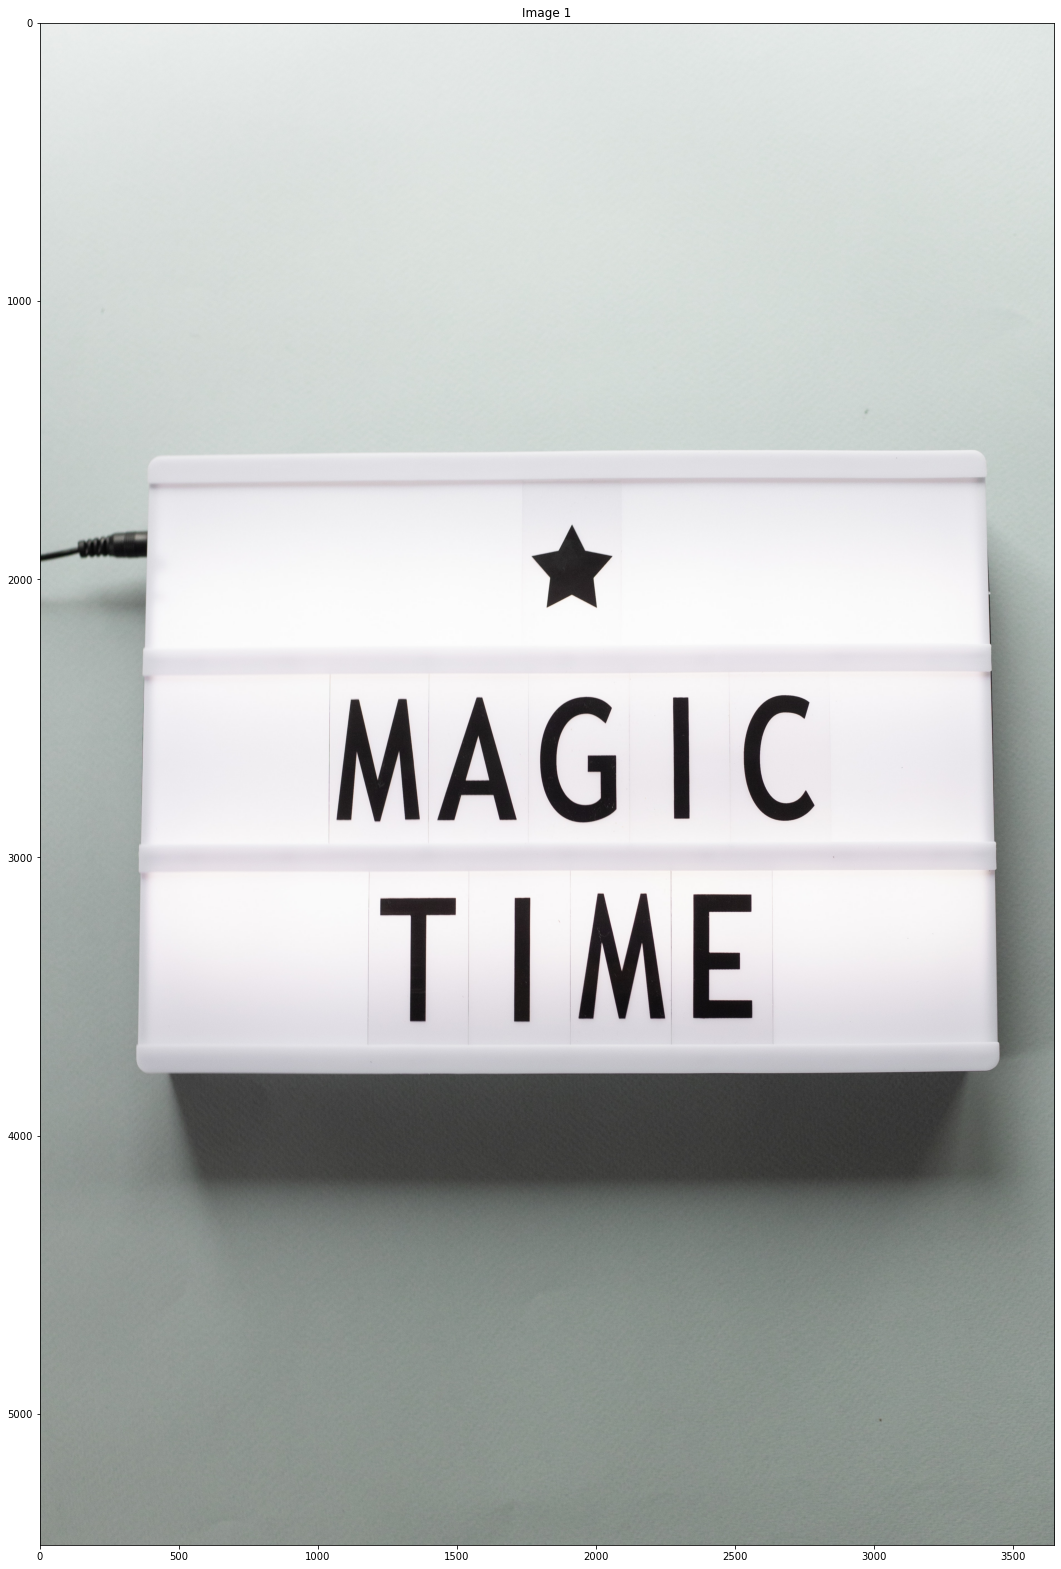

In [6]:
# Display input image file
plt.figure(figsize=(40,40))
plt.subplot(121); plt.imshow(img1[:,:,::-1]); plt.title('Image 1')

## Resize the input image
Notice that image-1 is quite large and has to be resized to a lower size to obtain an image in standard sized. We will be using the scaling factor set in the previous section to resize the image to required size

### <font style="color:rgb(8,133,37)">OpenCV Documentation</font>


[**`resize()`**](https://docs.opencv.org/4.5.2/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d)

In [7]:
# Get the scaling factor
scaling_factor = setScaleFactor(img1)

Text(0.5, 1.0, 'Resized')

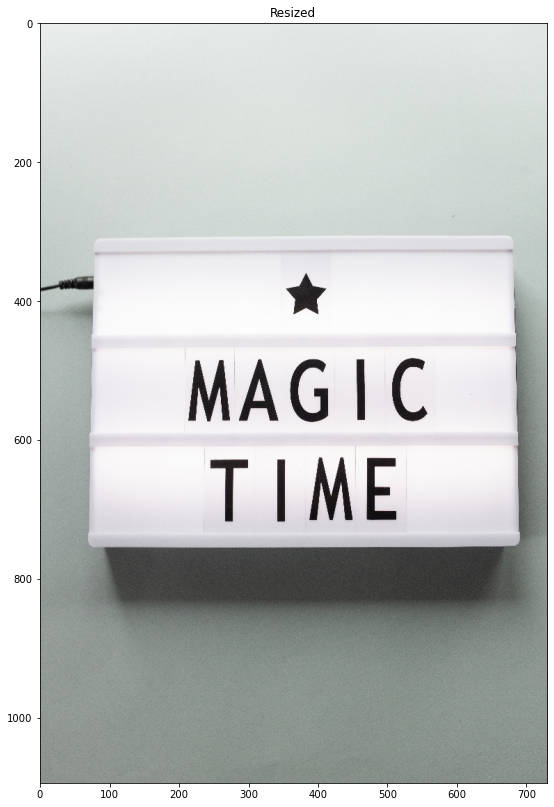

In [8]:
# Resize the image depending on the original image shape and the scaling factor
image = cv2.resize(img1, None, fx= scaling_factor, fy= scaling_factor, interpolation= cv2.INTER_LINEAR)

# Display resized image
plt.figure(figsize=(20,20))
plt.subplot(121); plt.imshow(image[:,:,::-1]); plt.title('Resized')


In [9]:
# Making copies of the original image
im_east = image.copy()
im_db18 = image.copy()
im_db50 = image.copy()

## Use East text detector on the image

The east text detector that is initialised previously in the program is applied on the image to detect text contained in the input image.Vertices of bounding boxes of roi containing text and its confusion matrix is given as output to the function.

In [10]:
# Use the East text detector to detect the presence of text in the image
boxes_east, confs_east = text_detector_east.detect(image)

# Use the DB18 text detector to detect the presence of text in the image
boxes_db18, confs_db18 = text_detector_db18.detect(image)

# Use the DB50 text detector to detect the presence of text in the image
boxes_db50, confs_db50 = text_detector_db50.detect(image)

## Draw the detected bounding boxes on roi

Text(0.5, 1.0, 'Bounding boxes for EAST')

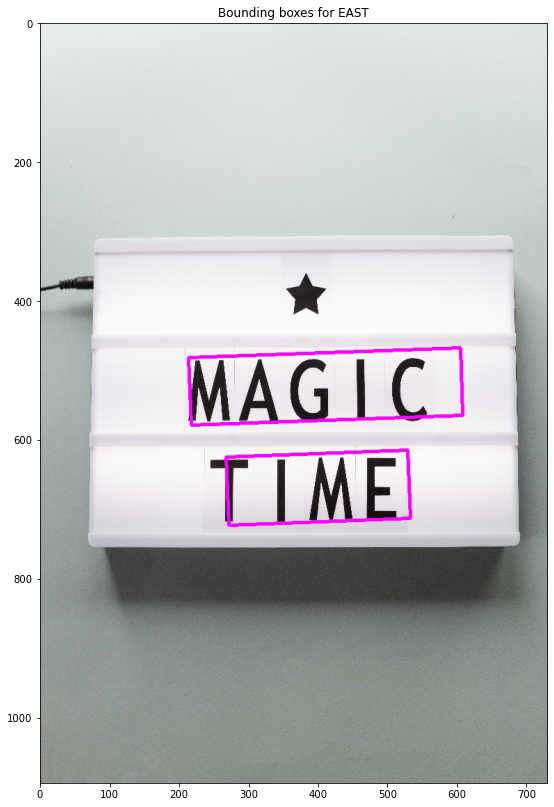

In [11]:
# Draw the bounding boxes of text detected using EAST.
cv2.polylines(im_east, boxes_east, True, (255, 0, 255), 4)

#Display the image with the bounding boxes drawn
plt.figure(figsize=(20,20))
plt.subplot(121); plt.imshow(im_east[:,:,::-1]); plt.title('Bounding boxes for EAST')


Text(0.5, 1.0, 'Bounding boxes from DB18')

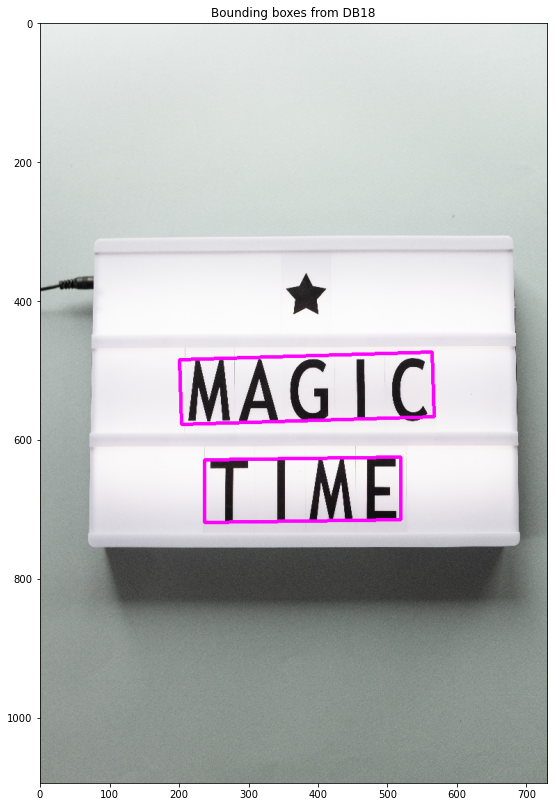

In [12]:
# Draw the bounding boxes of text detected using DB18.
cv2.polylines(im_db18, boxes_db18, True, (255, 0, 255), 4)

#Display the image with the bounding boxes drawn
plt.figure(figsize=(20,20))
plt.subplot(121); plt.imshow(im_db18[:,:,::-1]); plt.title('Bounding boxes from DB18')


Text(0.5, 1.0, 'Bounding boxes from DB50')

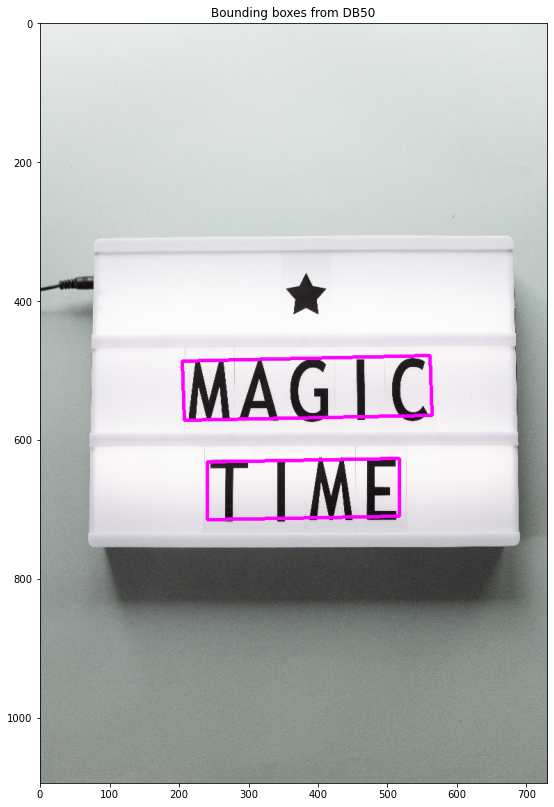

In [13]:
# Draw the bounding boxes of text detected using DB50.
cv2.polylines(im_db50, boxes_db50, True, (255, 0, 255), 4)

#Display the image with the bounding boxes drawn
plt.figure(figsize=(20,20))
plt.subplot(121); plt.imshow(im_db50[:,:,::-1]); plt.title('Bounding boxes from DB50')


Text(0.5, 1.0, 'Original | EAST | DB18 | DB50')

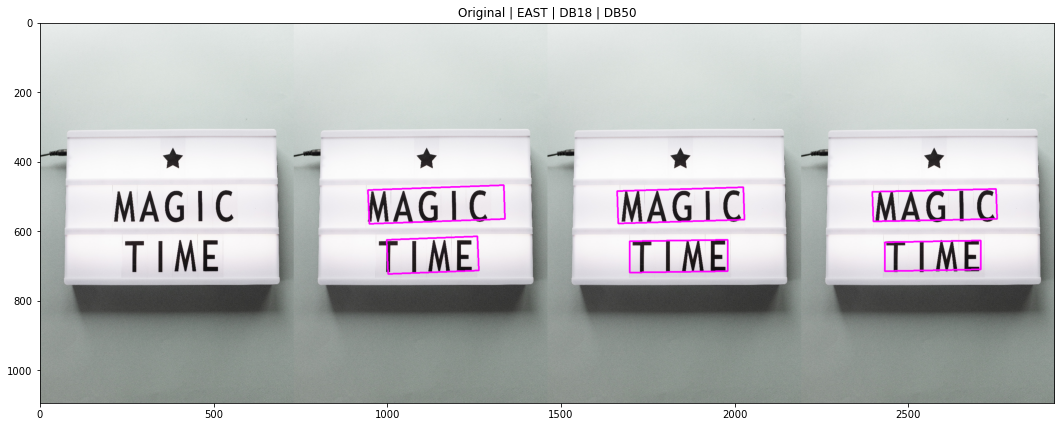

In [14]:
output = cv2.hconcat([image, im_east, im_db18, im_db50])
cv2.imwrite('visuals/english_signboard_detected.jpg', output)

# Display the output Image
plt.figure(figsize=(40,10))
plt.subplot(121); plt.imshow(output[:,:,::-1]); plt.title('Original | EAST | DB18 | DB50')

In [15]:
def detect_text(img):
    # Get the scaling factor
    scaling_factor = setScaleFactor(img)
    # Resize the image depending on the original image shape and the scaling factor
    image = cv2.resize(img, None, fx= scaling_factor, fy= scaling_factor, interpolation= cv2.INTER_LINEAR)

    # Making copies of the original image
    im_east = image.copy()
    im_db18 = image.copy()
    im_db50 = image.copy()

    # Use the East text detector to detect the presence of text in the image
    boxes_east, confs_east = text_detector_east.detect(image)
    # Use the DB text detector to detect the presence of text in the image
    boxes_db18, confs_db18 = text_detector_db18.detect(image)
    # Use the DB text detector to detect the presence of text in the image
    boxes_db50, confs_db = text_detector_db50.detect(image)

    # Draw the bounding boxes of text detected.
    cv2.polylines(im_east, boxes_east, True, (255, 0, 255), 4)
    # Draw the bounding boxes of text detected using DB18.
    cv2.polylines(im_db18, boxes_db18, True, (255, 0, 255), 4)
    # Draw the bounding boxes of text detected using DB50.
    cv2.polylines(im_db50, boxes_db50, True, (255, 0, 255), 4)
    
    output = cv2.hconcat([image, im_east, im_db18, im_db50])
    #Display the output image
    plt.figure(figsize=(40,10))
    plt.subplot(121); plt.imshow(output[:,:,::-1]); plt.title('Original | EAST | DB18 | DB50')



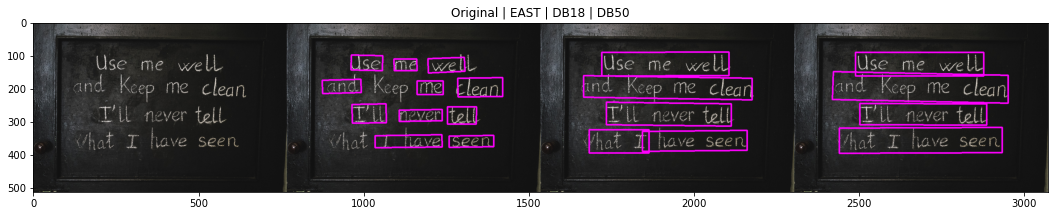

In [16]:
detect_text(img2)

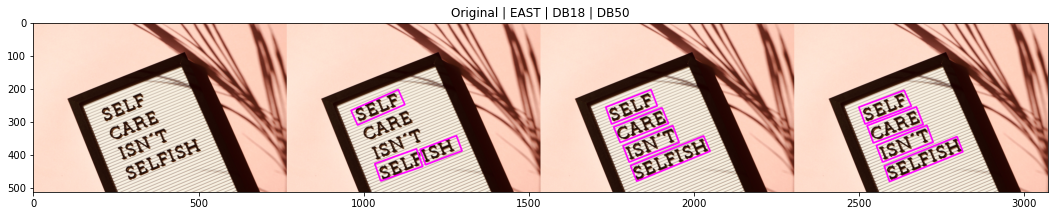

In [17]:
img3 = cv2.imread('./visuals/card.jpg')
detect_text(img3)

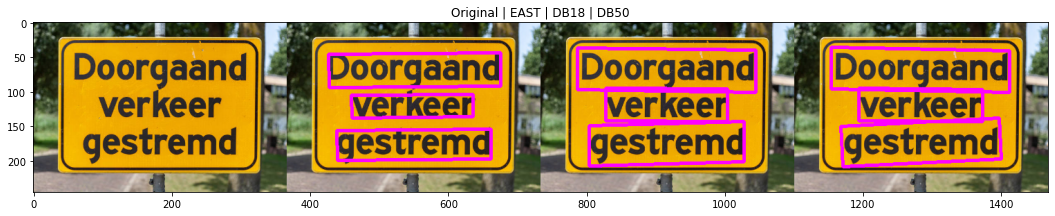

In [18]:
img4 = cv2.imread('./visuals/dutch_signboard.jpg')
detect_text(img4)

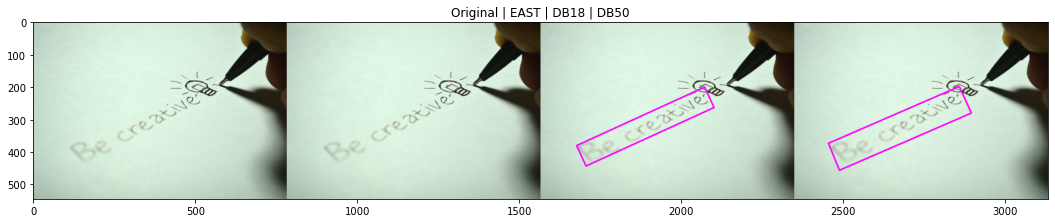

In [19]:
img5 = cv2.imread('./visuals/paper.jpg')
detect_text(img5)

Here, EAST text detector is unable to even detect any text!

## Runtime Comparison for EAST vs DB

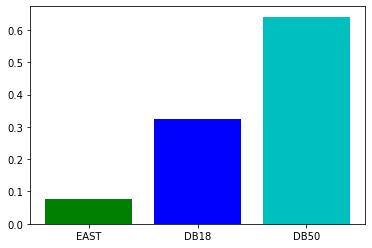

In [20]:
t1_east = time.time()
# Use the East text detector
for i in range(10):
    boxes_east, confs_east = text_detector_east.detect(image)
t2_east = time.time()
t_east = (t2_east - t1_east)/10

t1_db18 = time.time()
# Use the DB18 text detector 
for i in range(10):
    boxes_db, confs_db = text_detector_db18.detect(image)
t2_db18 = time.time()
t_db18 = (t2_db18 - t1_db18)/10

t1_db50 = time.time()
# Use the DB50 text detector 
for i in range(10):
    boxes_db, confs_db = text_detector_db50.detect(image)
t2_db50 = time.time()
t_db50 = (t2_db50 - t1_db50)/10

plt.bar(['EAST', 'DB18', 'DB50'], [t_east, t_db18, t_db50], color = ['g', 'b', 'c'])
plt.show()




## Conslusion

Detection of text data in an image is done using East text detection model and DB text detection model. DB is much more robust and accurate whereas EAST is much faster.


<hr style="border:2px solid gray"> </hr>









